In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 10    # 训练数据集
order = 10 # 方程阶数,线性方程为 y = w0 + w1*x + w2*x*x + w3*x*x*x + ...

#初始化数据集
X = np.linspace(0,1,n)  # 沿x轴，在0，1范围内，相同间隔生成n个数据
Y = np.sin(2*np.pi*X) + np.random.normal(0,0.2,n) # 目标值sin(2*pi*x) + 噪音（符合高斯分布）

In [3]:
def calc_w(n,m,X,Y):
    # 采用 close form solution方法求系数 w 的值
    
    fi = np.zeros([n,m])
    i = 0
    for x in X:
        for j in range(m):
            fi[i][j] = pow(x,j)
        i = i + 1
    fi_t = fi.transpose()
    w = np.dot(np.dot(np.linalg.inv(np.dot(fi_t,fi)),fi_t),Y.transpose())  # 应用求系数的公式
    return w.reshape(-1,1)

In [4]:
def error(n,m,w,X,Y):
    # 计算训练集的损失大小
    squared_error = 0
    for i in range(n):
        error = single_error(m,w,X[i],Y[i])
        squared_error += error**2
    return squared_error/2

In [5]:
def single_error(m,w,x,y):
    # 计算训练集中单个样例的损失大小
    pre_value = 0
    for i in range(m):
        pre_value += w[i][0]*pow(x,i)
    error = pre_value - y
    return error

In [6]:
m = order + 1
w = calc_w(n,m,X,Y)
e = error(n,m,w,X,Y)
print(w)
print(e)

[[ 1.68233763e-01]
 [-8.05213071e+01]
 [ 1.67503575e+03]
 [-1.19032815e+04]
 [ 3.59873359e+04]
 [-2.46142604e+04]
 [-1.33623106e+05]
 [ 4.01973704e+05]
 [-4.94227599e+05]
 [ 2.94969575e+05]
 [-7.01571845e+04]]
0.005969312907893707


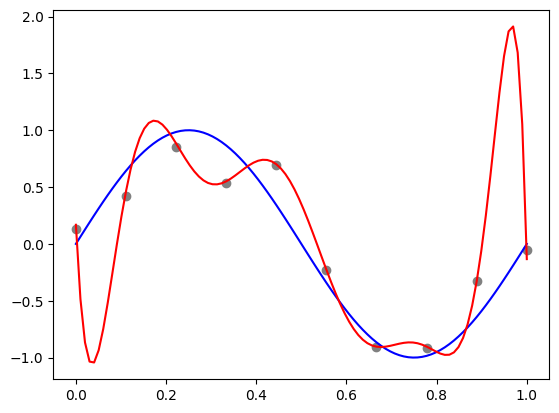

In [7]:
# 绘制样例数据
plt.scatter(X,Y,color='grey')

# 绘制原始曲线： y = sin(x)曲线
n1 = 100
X_1 = np.linspace(0,1,n1)  # 沿x轴，在0，1范围内，相同间隔生成n个数据
Y_1 = np.sin(2*np.pi*X_1)   # y = sin(x)
plt.plot(X_1,Y_1,color='blue')

# 绘制拟合函数线性函数的曲线：y = w0 + w1*x + w2*x*x + w3*x*x*x + ...
Y_2 = []
for x in X_1:
    y = 0
    for j in range(m):
        y += w[j][0]*pow(x,j)  
    Y_2.append(y) 
plt.plot(X_1,Y_2,color='red')